In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re 
stem = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df = pd.read_csv('Senti_vaccination_all_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [2]:
df.isnull().sum()

id                      0
user_name               2
user_location       66911
user_description    17018
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

As the "user_location", "User_description", "hashtags" have large number of null values we can drop them from the dataset.

In [3]:
df.drop(columns = "user_description",axis = 1)
df.drop(columns = 'user_location',axis = 1)
df.drop(columns = 'hashtags',axis = 1)
df.drop(columns = 'source',axis = 1)
print(df.head())

                    id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405  

Extracting text column for sentiment analysis as the tweets which are posted on the internet tells us the people's feeling about the pfizer vaccine.

In [4]:
stopword = set(stopwords.words('english'))

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(" ") if word not in stopword]
    text = " ".join(text)
    return text
df['text'] = df['text'].apply(clean)
print(df)

                         id             user_name              user_location  \
0       1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1       1338158543359250433           Albert Fong          San Francisco, CA   
2       1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3       1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4       1337854064604966912  Citizen News Channel                        NaN   
...                     ...                   ...                        ...   
228202  1460170772299665408                VaxBLR           Bengaluru, India   
228203  1460163268262051841                VaxBLR           Bengaluru, India   
228204  1460163224221851655                VaxBLR           Bengaluru, India   
228205  1460156376995573765      Gatti Valentino🐾          Southern  Africa    
228206  1460155671140134912                VaxBLR           Bengaluru, India   

                                       

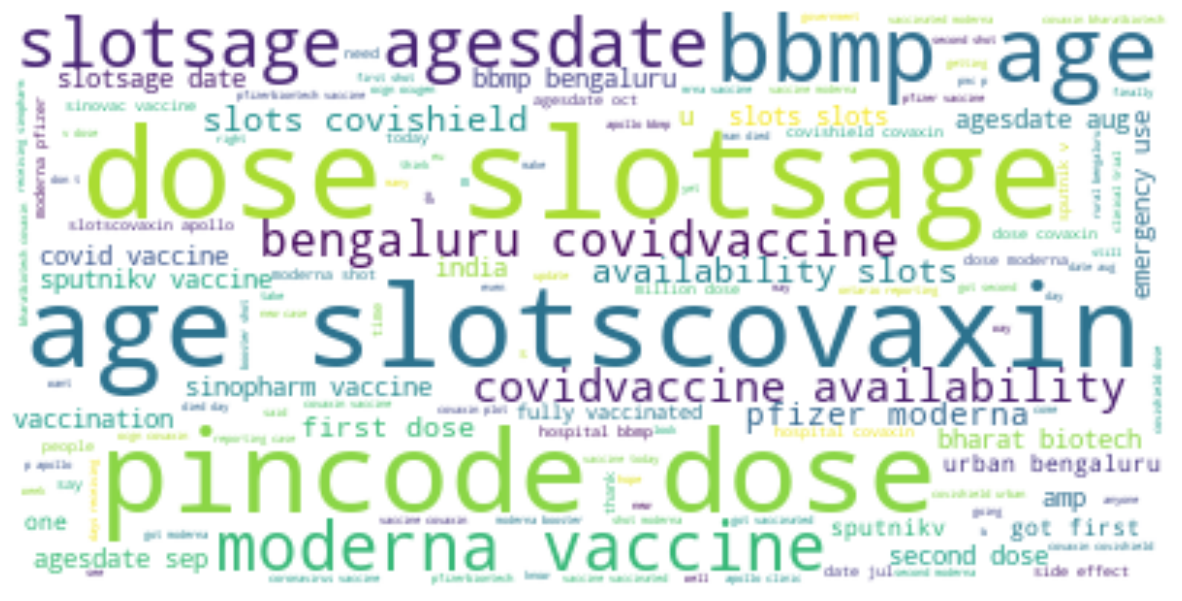

In [6]:
text = ' '.join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis("off")
plt.show()

In [7]:
senti = SentimentIntensityAnalyzer()
df['Positive'] = [senti.polarity_scores(i)['pos'] for i in df["text"]]
df['Negative'] = [senti.polarity_scores(i)['neg']for i in df['text']]
df['Neutral'] = [senti.polarity_scores(i)['neu']for i in df['text']]
df = df[['text','Positive','Negative','Neutral']]
df.head()

,text,Positive,Negative,Neutral
0,folks said daikon paste could treat cytokine s...,0.252,0.000,0.748
1,world wrong side history year hopefully bigges...,0.182,0.209,0.608
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.182,0.000,0.818
3,facts immutable senator even youre ethically s...,0.000,0.000,1.000
4,explain need vaccine borisjohnson matthancock ...,0.000,0.000,1.000


In [8]:
pos = sum(df["Positive"])
neg = sum(df["Negative"])
neu = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(pos, neg, neu)

print("Positive",pos)
print("Negative",neg)
print("Neutral",neu)

Neutral 🙂 
Positive 23365.38500000205
Negative 10460.861000000192
Neutral 194361.0980000155
